Documentation Link: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

Voting Blog: https://vitalflux.com/hard-vs-soft-voting-classifier-python-example/

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import VotingClassifier

In [2]:
df = pd.read_csv("Datasets/Iris.csv")

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df = df.drop(columns=['Id'])

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.Species.nunique()

3

In [6]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
df.shape

(150, 5)

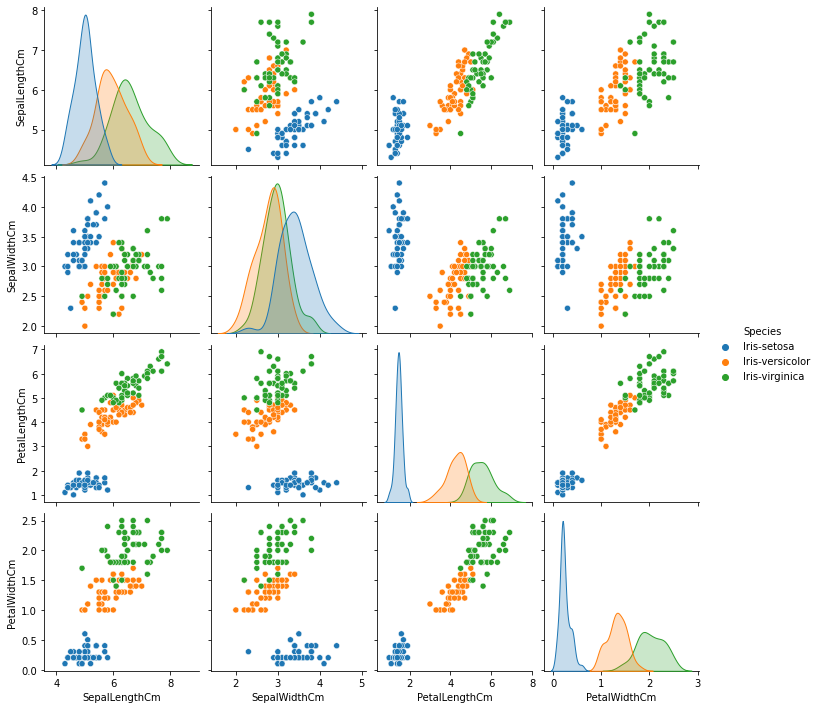

In [8]:
sns.pairplot(data=df, hue="Species")

plt.show()

## Encoded the target columns

In [9]:
encoder = LabelEncoder()

In [10]:
df['Species'] = encoder.fit_transform(y=df['Species'])

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
86,6.7,3.1,4.7,1.5,1
120,6.9,3.2,5.7,2.3,2
125,7.2,3.2,6.0,1.8,2
65,6.7,3.1,4.4,1.4,1
108,6.7,2.5,5.8,1.8,2
80,5.5,2.4,3.8,1.1,1
2,4.7,3.2,1.3,0.2,0
146,6.3,2.5,5.0,1.9,2
28,5.2,3.4,1.4,0.2,0
112,6.8,3.0,5.5,2.1,2


In [12]:
# Split the dataset

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [13]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [15]:
# Make classifier object
# Without hyper parameter tuning. If you want you can tune the parameter for best accuracy

clf1 = LogisticRegression(max_iter=150)
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [16]:
estimators = [('lr', clf1), ('rf', clf2), ('knn', clf3)]

In [17]:
for est_name, est in estimators:
    result = cross_val_score(estimator=est, X=X, y=y, scoring="accuracy", cv=10)
    print(f"Estimator name: {est_name} and accuracy is: {np.round(np.mean(result), 2)}")

Estimator name: lr and accuracy is: 0.97
Estimator name: rf and accuracy is: 0.96
Estimator name: knn and accuracy is: 0.97


## Hard voting

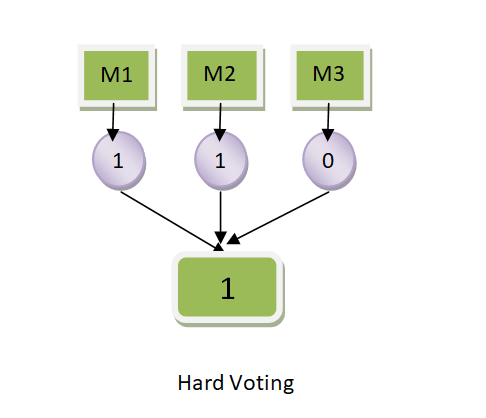

In [19]:
voting_classifier = VotingClassifier(estimators=estimators, voting="hard")

In [21]:
best_result = cross_val_score(estimator=voting_classifier, X=X, y=y, scoring="accuracy", cv=10)

print(f"The Accuracy is: {np.round(np.mean(best_result), 2)}")

The Accuracy is: 0.97


## Soft voting

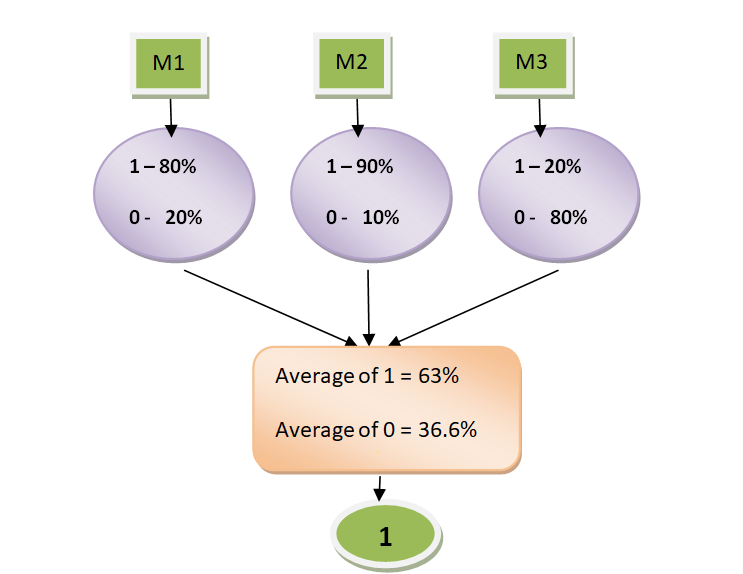

In [22]:
voting_classifier2 = VotingClassifier(estimators=estimators, voting="soft")

best_result2 = cross_val_score(estimator=voting_classifier2, X=X, y=y, scoring="accuracy", cv=10)

print(f"The Accuracy is: {np.round(np.mean(best_result2), 2)}")

The Accuracy is: 0.96


## Weighted Voting

In [28]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators, voting="soft", weights=[i, j, k])
            result = cross_val_score(estimator=vc, X=X, y=y, scoring='accuracy', cv=10)
            print("for i={},j={},k={}".format(i,j,k), np.round(np.mean(result),2))

for i=1,j=1,k=1 0.97
for i=1,j=1,k=2 0.96
for i=1,j=1,k=3 0.97
for i=1,j=2,k=1 0.97
for i=1,j=2,k=2 0.96
for i=1,j=2,k=3 0.96
for i=1,j=3,k=1 0.97
for i=1,j=3,k=2 0.96
for i=1,j=3,k=3 0.96
for i=2,j=1,k=1 0.97
for i=2,j=1,k=2 0.96
for i=2,j=1,k=3 0.97
for i=2,j=2,k=1 0.96
for i=2,j=2,k=2 0.96
for i=2,j=2,k=3 0.96
for i=2,j=3,k=1 0.97
for i=2,j=3,k=2 0.97
for i=2,j=3,k=3 0.96
for i=3,j=1,k=1 0.97
for i=3,j=1,k=2 0.96
for i=3,j=1,k=3 0.97
for i=3,j=2,k=1 0.96
for i=3,j=2,k=2 0.96
for i=3,j=2,k=3 0.96
for i=3,j=3,k=1 0.97
for i=3,j=3,k=2 0.97
for i=3,j=3,k=3 0.96


## Classifiers of Same Algo

Documentation Link: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [30]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification

In [31]:


X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

for estimator in estimators:
    result = cross_val_score(estimator=estimator[1], X=X, y=y, scoring="accuracy", cv=10)
    print(estimator[0], np.round(np.mean(result),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [32]:
voting_classifier3 = VotingClassifier(estimators=estimators, voting="soft")

best_result3 = cross_val_score(estimator=voting_classifier2, X=X, y=y, scoring="accuracy", cv=10)

print(f"The Accuracy is: {np.round(np.mean(best_result3), 2)}")

The Accuracy is: 0.9


In [ ]:
# importing libraries
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# loading iris dataset
iris = load_iris()
X = iris.data[:, :4]
Y = iris.target

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size = 0.20, random_state = 42)

# group / ensemble of models
estimator = []
estimator.append(('LR', LogisticRegression(solver ='lbfgs', multi_class ='multinomial', max_iter = 200)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))

# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X=X_train, y=y_train)
y_pred = vot_hard.predict(X=X_test)

# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred)
print("Hard Voting Score % d" % score)

# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(X=X_train, y=y_train)
y_pred = vot_soft.predict(X=X_test)

# using accuracy_score
score = accuracy_score(y_test, y_pred)
print("Soft Voting Score % d" % score)
